In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import DCCSMLM

In [2]:
only_p = False  # Set this to True if only p (but not m) should be considered -> use Eq. 1


reference = DCCSMLM.DCCReferenceProteins("ExampleData/CalibrationValues.csv", "rate_mVenus", "stoichiometry")
reference.reference_bootstrap(10_000, save_result=True, only_p=only_p) # Run bootstrap with 10000 resamples



array([[0.28210983, 0.16440547],
       [0.28293548, 0.16420803],
       [0.32270754, 0.16872474],
       ...,
       [0.32581867, 0.17391189],
       [0.23705912, 0.15883208],
       [0.37102433, 0.17589973]])

Mean m: 0.299100237219069, 95% CI: 0.2050693378775436 - 0.38859355575232046
Mean p: 0.16558736730231036, 95% CI: 0.15026584757013228 - 0.1814834474507337
R² = 0.9670026616690833


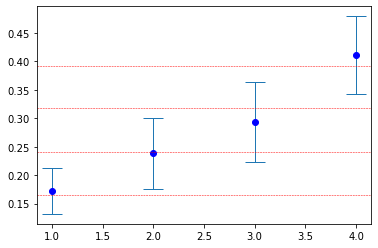

In [4]:

# Print p and m
print(f"Mean m: {reference.m}, 95% CI: {reference.m_ci[0]} - {reference.m_ci[1]}")
print(f"Mean p: {reference.p}, 95% CI: {reference.p_ci[0]} - {reference.p_ci[1]}")

# Print the r^2
corr_matrix = np.corrcoef(reference.reference_mean, reference.E(n=4, only_p=only_p))
corr = corr_matrix[0,1]
R_sq = corr**2
 
print(f"R² = {R_sq}")

# Plot the information
plt.figure()
plt.plot(range(1,5), reference.reference_mean, "bo") # Experimentally determined means
# Experimentally determined standard deviations
plt.errorbar(range(1,5), reference.reference_mean, yerr=reference.reference_std, capsize=10, lw=1, fmt="none")
# Horizontal lines indicate expected colocalization values based on the mean values for p and m of the bootstrap
[plt.axhline(e, color="red", ls="--", lw=0.5) for e in reference.E(n=4)]
plt.show()